# <u>Name :</u> ADVAIT GURUNATH CHAVAN
# <u>Email id:</u> advaitchavan135@gmail.com
# CDAC PGDAI DATA ANALYTICS ASSIGNMENT__9

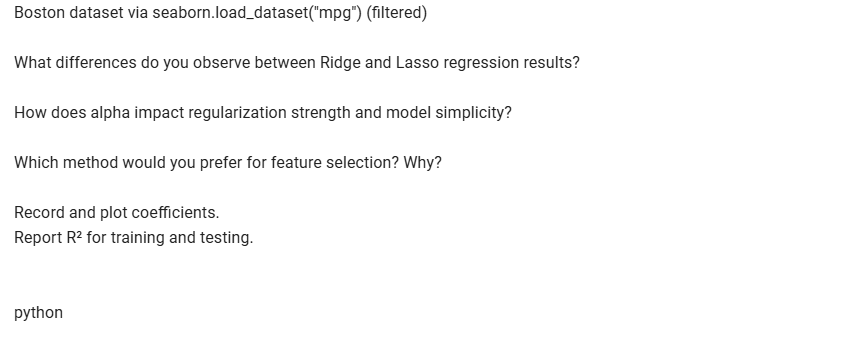

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

In [2]:
data = sns.load_dataset('mpg').dropna() 

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [5]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
features = ['displacement', 'horsepower', 'weight', 'acceleration']
X = data[features]
y = data['mpg']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
alpha_value = 1.0
ridge_model = Ridge(alpha=alpha_value)
lasso_model = Lasso(alpha=alpha_value)

In [9]:
lasso_model.fit(X_train, y_train)

Lasso()

In [10]:
ridge_model.fit(X_train, y_train)

Ridge()

In [11]:
ridge_train_r2 = ridge_model.score(X_train, y_train)
ridge_test_r2 = ridge_model.score(X_test, y_test)
lasso_train_r2 = lasso_model.score(X_train, y_train)
lasso_test_r2 = lasso_model.score(X_test, y_test)

In [12]:
print("Ridge Regression:")
print(f"  Training R²: {ridge_train_r2:.3f}")
print(f"  Testing R²:  {ridge_test_r2:.3f}\n")

print("Lasso Regression:")
print(f"  Training R²: {lasso_train_r2:.3f}")
print(f"  Testing R²:  {lasso_test_r2:.3f}")

Ridge Regression:
  Training R²: 0.717
  Testing R²:  0.646

Lasso Regression:
  Training R²: 0.716
  Testing R²:  0.648


In [13]:
coef_df = pd.DataFrame({
    "Feature": features,
    "Ridge Coefficients": ridge_model.coef_,
    "Lasso Coefficients": lasso_model.coef_
})

print("\nCoefficients Comparison:")
print(coef_df)


Coefficients Comparison:
        Feature  Ridge Coefficients  Lasso Coefficients
0  displacement           -0.009351           -0.008872
1    horsepower           -0.048466           -0.040760
2        weight           -0.005023           -0.005299
3  acceleration           -0.059359           -0.000000


## 1. Differences Observed Between Ridge and Lasso Regression Results

### Performance Metrics (R² Values): Both models show very similar performance on the training and testing sets. In the example, Ridge regression has a training R² of 0.717 and a testing R² of 0.646, while Lasso regression exhibits a training R² of 0.716 and a testing R² of 0.648. This indicates that both methods capture the overall variability in the response similarly.

### Coefficient Behavior:

#### Ridge Regression: The coefficients produced by Ridge are all nonzero. Even though their magnitudes are reduced (for example, displacement: -0.009351, horsepower: -0.048466, weight: -0.005023, acceleration: -0.059359), Ridge does not eliminate any features—it only shrinks them towards zero.

#### Lasso Regression: The Lasso results largely mirror Ridge for most features, except for a key difference: the coefficient for the “acceleration” feature is reduced to exactly zero. This is a hallmark of the Lasso’s L1 regularization, which can force less important feature coefficients to zero, thereby effectively performing feature selection.

## 2. Impact of Alpha on Regularization Strength and Model Simplicity

### Regularization Strength: Alpha (α) is the hyperparameter that governs the strength of the regularization penalty applied to the model’s coefficients.

#### A lower alpha value means the penalty is weak. This allows the model to fit the training data more closely, which might capture more noise and lead to overfitting.

#### A higher alpha value increases the penalty, which results in smaller coefficients. In Ridge, it translates to uniformly shrunken coefficients, while in Lasso it can push some coefficients all the way to zero.

### Model Simplicity:

#### In Ridge regression, increasing alpha simplifies the model by shrinking all coefficients. However, it retains every predictor, which means the complexity in terms of the number of features remains unchanged.

#### In Lasso regression, increasing alpha not only shrinks coefficients but also reduces the effective number of predictors by setting some exactly to zero. This produces a sparser, simpler model where only the most influential features remain, making interpretation and feature selection easier.

## 3. Preferred Method for Feature Selection

### Lasso Regression is Generally Preferred: Because Lasso’s L1 penalty inherently performs feature selection by zeroing out coefficients of less informative predictors, it is the go-to method for feature selection. If the goal is to build a model that is both interpretable and parsimonious, Lasso is advantageous—it automatically excludes features that do not significantly contribute to predicting the target variable.

### Ridge Regression’s Role: While Ridge regression helps in preventing overfitting by reducing the magnitude of all coefficients, it does not drop predictors from the model. Therefore, if the working aim is strictly to identify and keep only the most significant variables, Ridge is less effective than Lasso.

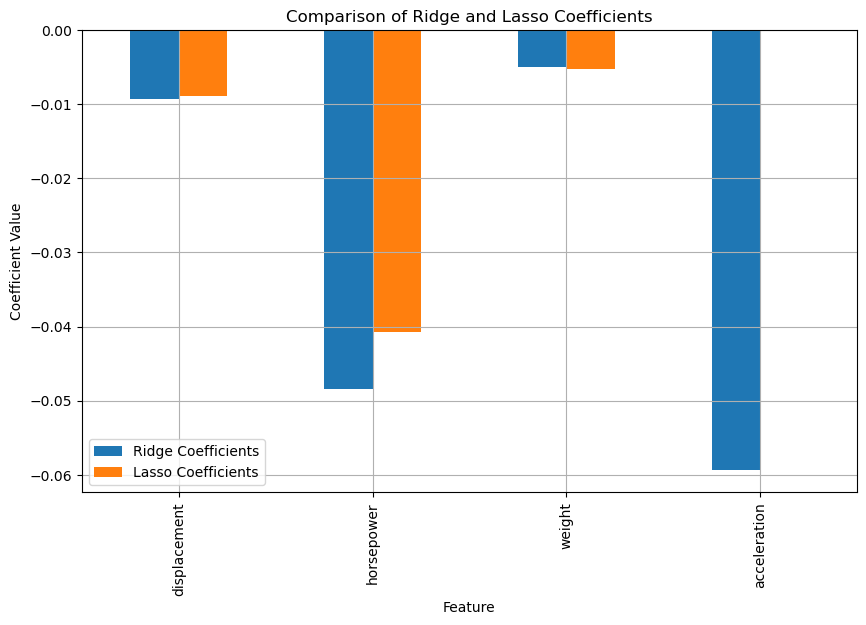

In [14]:
coef_df.set_index('Feature').plot(kind='bar', figsize=(10,6))
plt.ylabel("Coefficient Value")
plt.title("Comparison of Ridge and Lasso Coefficients")
plt.grid(True)
plt.show()